In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import random
%precision 4

'%.4f'

In [2]:
def MC_barrier(barrier,S,K,T,r,d,sigma,N,npaths,flag1='Knock-out options',flag2='call'):
    Spath=np.zeros((2*npaths,N))
    zin=np.random.standard_normal((npaths,N))
    z=np.vstack((zin,-zin))
    z=stats.zscore(z)
    dt=T/N
    Spath[:,0]=S
    ST=np.zeros((2*npaths))
   
    for j in np.arange(1,N):
        Spath[:,j]=Spath[:,j-1]*np.exp((r-d-sigma**2/2)*dt+sigma*np.sqrt(dt)*z[:,j])
        
    if flag1=='Knock-out options':
        if S>barrier:#down and out
            for j in range(len(Spath)):
                if np.min(Spath[j])>barrier:
                    ST[j]=Spath[j,-1]
                    
                else:
                    ST[j]=0
                    
        elif S<barrier:#up and out
            for j in range(len(Spath)):
                if np.max(Spath[j])<barrier:
                    ST[j]=Spath[j,-1]
                    up_and_out_call=ST[j]
                else:
                    ST[j]=0
                    up_and_out_call=ST[j]
        if flag2=='call':
            payoffs=np.maximum(ST-K,0)
        elif flag2=='put':
            payoffs=np.zeros(2*npaths)
            for i in range(len(ST)):
              if (ST[i]!=0) & ((K-ST[i])>0):
                payoffs[i]=K-ST[i]
                

        option_price=np.mean(payoffs)*np.exp(-r*T)
    elif flag1=='Knock-in options':
        
        if S>barrier:#down and in
            for j in range(len(Spath)):
                if np.min(Spath[j])<barrier:
                    ST[j]=Spath[j,-1]
                    
                else:
                    ST[j]=0
                    
        elif S<barrier:#up and in
            for j in range(len(Spath)):
                if np.max(Spath[j])>barrier:
                    ST[j]=Spath[j,-1]
                    
                else:
                    ST[j]=0
                    
        if flag2=='call':
            payoffs=np.maximum(ST-K,0)
        elif flag2=='put':
            payoffs=np.zeros(2*npaths)
        for i in range(len(ST)):
            if (ST[i]!=0) and ((K-ST[i])>0):
              payoffs[i]=K-ST[i]
        
        option_price=np.mean(payoffs)*np.exp(-r*T)
    return option_price

In [3]:
MC_barrier(90,100,95,1,0.05,0.01,0.2,365,10000,"Knock-out options","put")

0.029073954351170547

In [4]:
barrier=90; S=100; K =75; T = 1; r = 0.005; d = 0.01; sigma= 0.2; N=365 ; npaths=10000 

In [5]:
barrier_put_option = MC_barrier(barrier,S,K,T,r,d,sigma,N,npaths,flag1='Knock-in options',flag2='put')
barrier_put_option

0.60175130308459

In [25]:
K = np.linspace(75, 125, 5) 
K = K[:, np.newaxis] 
barrier_call_option_list=[]
barrier_put_option_list=[]
barrier_down_and_out_call=[]
barrier_up_and_out_call=[]
barrier_up_and_in_call=[]
barrier_down_and_in_call=[]
barrier_down_and_out_put=[]
barrier_up_and_out_put=[]
barrier_up_and_in_put=[]
barrier_down_and_in_put=[]
for i in range(len(K)):
  barrier_call_option1 = MC_barrier(barrier,S,K[i],T,r,d,sigma,N,npaths,flag1='Knock-out options',flag2='call')
  if S>barrier:
    barrier_down_and_out_call.append(barrier_call_option1)
    barrier_up_and_out_call.append(0)
  else:
    barrier_up_and_out_call.append(barrier_call_option1)
    barrier_down_and_out_call.append(0)

  barrier_call_option2 = MC_barrier(barrier,S,K[i],T,r,d,sigma,N,npaths,flag1='Knock-in options',flag2='call') 
  if S>barrier:
    barrier_down_and_in_call.append(barrier_call_option2)
    barrier_up_and_in_call.append(0)
  else:
    barrier_up_and_in_call.append(barrier_call_option2)
    barrier_down_and_in_call.append(0)
  
  barrier_put_option1 = MC_barrier(barrier,S,K[i],T,r,d,sigma,N,npaths,flag1='Knock-in options',flag2='put')
  if S> barrier:
    barrier_up_and_out_put.append(barrier_put_option1)
    barrier_down_and_out_put.append(0)
  else:
    barrier_down_and_out_put.append(barrier_put_option1)
    barrier_up_and_out_put.append(0)
  barrier_put_option2 = MC_barrier(barrier,S,K[i],T,r,d,sigma,N,npaths,flag1='Knock-in options',flag2='put') 
  if S>barrier:
    barrier_up_and_in_put.append(barrier_put_option2)
    barrier_down_and_in_put.append(0)
  else:
    barrier_down_and_in_put.append(barrier_put_option2)
    barrier_up_and_in_put.append(0)
  

# Barr_OptionsPerStrike = pd.DataFrame(np.concatenate([K, barrier_call_option, barrier_put_option], axis=1),columns = ["Strike", "Call", "Put"]) # data = np.concatenate([K, c, p], axis = 1)
# display(Barr_OptionsPerStrike) # εμφάνιση του DataFrame


In [26]:
merge_data=pd.DataFrame(
    {'K': K.tolist(),
     'barrier_down_and_out_call': barrier_down_and_out_call,
     'barrier_up_and_out_call': barrier_up_and_out_call,
     'barrier_up_and_in_call': barrier_up_and_in_call,
     'barrier_up_and_in_call': barrier_up_and_in_call,
     'barrier_down_and_in_call': barrier_down_and_in_call,
     'barrier_down_and_out_put': barrier_down_and_out_put,
     'barrier_up_and_in_put': barrier_up_and_in_put,
     'barrier_down_and_in_put':barrier_down_and_in_put
    })

In [27]:
display(merge_data)

,K,barrier_down_and_out_call,barrier_up_and_out_call,barrier_up_and_in_call,barrier_down_and_in_call,barrier_down_and_out_put,barrier_up_and_in_put,barrier_down_and_in_put
0,[75.0],0,4.866424,20.341118,0,0.040789,0,0.047138
1,[87.5],0,1.462151,13.745699,0,0.371363,0,0.354174
2,[100.0],0,0.146270,9.193080,0,1.685886,0,1.665354
3,[112.5],0,0.000000,8.178821,0,4.588985,0,4.665561
4,[125.0],0,0.000000,11.161395,0,9.748891,0,9.782033


Text(0.5, 1.0, 'Barrier Put Option')

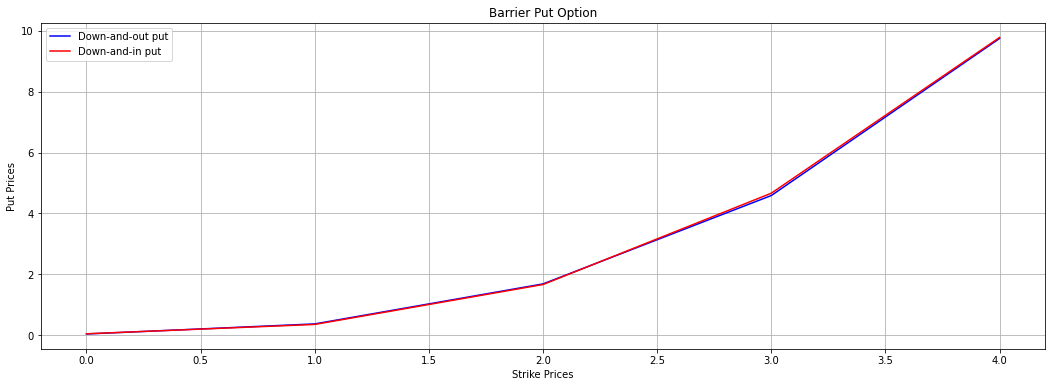

In [29]:
plt.figure(figsize= (18,6))
plt.plot(merge_data['barrier_down_and_out_put'],'b', lw=1.5, label='Down-and-out put')
plt.plot(merge_data['barrier_down_and_in_put'],'r', lw=1.5, label='Down-and-in put')
plt.grid(True) 
plt.legend() 
plt.axis('tight')
plt.xlabel('Strike Prices')
plt.ylabel('Put Prices')  
plt.title('Barrier Put Option')

In [30]:
barrier=110; S=100; K =75; T = 1; r = 0.005; d = 0.01; sigma= 0.2; N=365 ; npaths=10000 

In [31]:
K = np.linspace(75, 125, 5) 
K = K[:, np.newaxis] 

barrier_call_option_list=[]
barrier_put_option_list=[]
barrier_down_and_out_call=[]
barrier_up_and_out_call=[]
barrier_up_and_in_call=[]
barrier_down_and_in_call=[]
barrier_down_and_out_put=[]
barrier_up_and_out_put=[]
barrier_up_and_in_put=[]
barrier_down_and_in_put=[]
for i in range(len(K)):
  barrier_call_option1 = MC_barrier(barrier,S,K[i],T,r,d,sigma,N,npaths,flag1='Knock-out options',flag2='call')
  if S>barrier:
    barrier_down_and_out_call.append(barrier_call_option1)
    barrier_up_and_out_call.append(0)
  else:
    barrier_up_and_out_call.append(barrier_call_option1)
    barrier_down_and_out_call.append(0)

  barrier_call_option2 = MC_barrier(barrier,S,K[i],T,r,d,sigma,N,npaths,flag1='Knock-in options',flag2='call') 
  if S>barrier:
    barrier_down_and_in_call.append(barrier_call_option2)
    barrier_up_and_in_call.append(0)
  else:
    barrier_up_and_in_call.append(barrier_call_option2)
    barrier_down_and_in_call.append(0)
  
  barrier_put_option1 = MC_barrier(barrier,S,K[i],T,r,d,sigma,N,npaths,flag1='Knock-in options',flag2='put')
  if S> barrier:
    barrier_down_and_out_put.append(barrier_put_option1)
    barrier_up_and_out_put.append(0)
  else:
    barrier_up_and_out_put.append(barrier_put_option1)
    barrier_down_and_out_put.append(0)
  barrier_put_option2 = MC_barrier(barrier,S,K[i],T,r,d,sigma,N,npaths,flag1='Knock-in options',flag2='put') 
  if S>barrier:
    barrier_down_and_in_put.append(barrier_put_option2)
    barrier_up_and_in_put.append(0)
  else:
    barrier_up_and_in_put.append(barrier_put_option2)
    barrier_down_and_in_put.append(0)

In [32]:
merge_data=pd.DataFrame(
    {'K': K.tolist(),
     'barrier_down_and_out_call': barrier_down_and_out_call,
     'barrier_up_and_out_call': barrier_up_and_out_call,
     'barrier_up_and_in_call': barrier_up_and_in_call,
     'barrier_up_and_in_call': barrier_up_and_in_call,
     'barrier_down_and_in_call': barrier_down_and_in_call,
     'barrier_down_and_out_put': barrier_down_and_out_put,
     'barrier_up_and_in_put': barrier_up_and_in_put,
     'barrier_down_and_in_put':barrier_down_and_in_put
    })

Text(0.5, 1.0, 'Barrier Call Option')

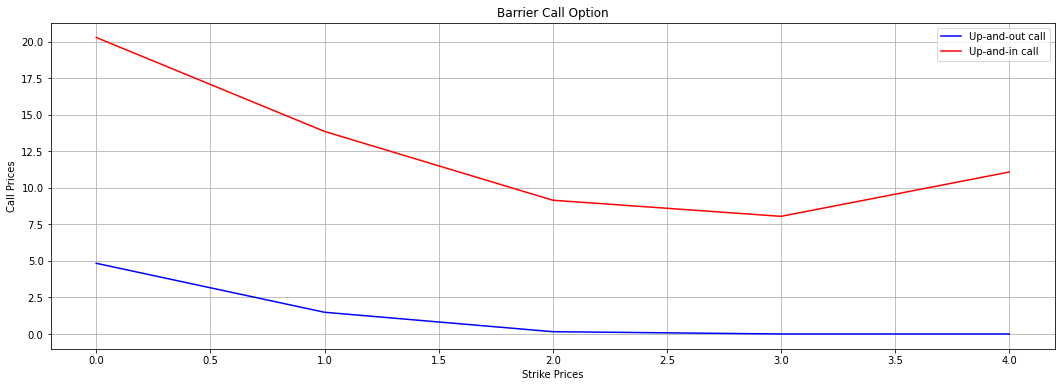

In [33]:
plt.figure(figsize= (18,6))
plt.plot(merge_data['barrier_up_and_out_call'],'b', lw=1.5, label='Up-and-out call')
plt.plot(merge_data['barrier_up_and_in_call'],'r', lw=1.5, label='Up-and-in call')
plt.grid(True) 
plt.legend() 
plt.axis('tight')
plt.xlabel('Strike Prices')
plt.ylabel('Call Prices')  
plt.title('Barrier Call Option')